In [1]:
!mkdir srag_data
!wget -nc -P srag_data/ https://gitlab.procc.fiocruz.br/mave/repo/-/raw/master/Dados/InfoGripe/dados_semanais_faixa_etaria_sexo_virus_sem_filtro_sintomas.csv

mkdir: cannot create directory ‘srag_data’: File exists
File ‘srag_data/dados_semanais_faixa_etaria_sexo_virus_sem_filtro_sintomas.csv’ already there; not retrieving.



In [2]:
import pandas as pd

In [3]:
obitos = (
    pd.read_csv('srag_data/dados_semanais_faixa_etaria_sexo_virus_sem_filtro_sintomas.csv', sep=';', decimal=',')
    .query('`Tipo` == "Estado"')
    .query('dado == "obito"')
    .query('sexo == "Total"')
    .query('escala == "casos"')
    .query('`Semana epidemiológica` < 20')
    .set_index(['Ano epidemiológico', 'Unidade da Federação', 'Semana epidemiológica'])
)

In [4]:
obitos.head()

data de publicação  \
Ano epidemiológico Unidade da Federação Semana epidemiológica                      
2009               Rondônia             1                             2020-05-18   
                                        2                             2020-05-18   
                                        3                             2020-05-18   
                                        4                             2020-05-18   
                                        5                             2020-05-18   

                                                               UF    Tipo  \
Ano epidemiológico Unidade da Federação Semana epidemiológica               
2009               Rondônia             1                      11  Estado   
                                        2                      11  Estado   
                                        3                      11  Estado   
                                        4                      11  Estado   
                                        5                      11  Estado   

                                                                dado escala  \
Ano epidemiológico Unidade da Federação Semana epidemiológica                 
2009               Rondônia             1                      obito  casos   
                                        2                      obito  casos   
                                        3                      obito  casos   
                                        4                      obito  casos   
                                        5                      obito  casos   

                                                                sexo  \
Ano epidemiológico Unidade da Federação Semana epidemiológica          
2009               Rondônia             1                      Total   
                                        2                      Total   
                                        3                      Total   
                                        4                      Total   
                                        5                      Total   

                                                              Ano e semana epidemiológica  \
Ano epidemiológico Unidade da Federação Semana epidemiológica                               
2009               Rondônia             1                                         2009W01   
                                        2                                         2009W02   
                                        3                                         2009W03   
                                        4                                         2009W04   
                                        5                                         2009W05   

                                                                                           Situação do dado  \
Ano epidemiológico Unidade da Federação Semana epidemiológica                                                 
2009               Rondônia             1                      Dado estável. Sujeito a pequenas alterações.   
                                        2                      Dado estável. Sujeito a pequenas alterações.   
                                        3                      Dado estável. Sujeito a pequenas alterações.   
                                        4                      Dado estável. Sujeito a pequenas alterações.   
                                        5                      Dado estável. Sujeito a pequenas alterações.   

                                                               Total reportado até a última atualização  \
Ano epidemiológico Unidade da Federação Semana epidemiológica                                             
2009               Rondônia             1                                                           0.0   
                                        2                                                           0.0   
                

In [5]:
obitos_per_week = (
    obitos
    [['Total reportado até a última atualização']]
    .swaplevel(0, 2)
    .unstack()
    .droplevel(0, axis=1)
    [[2016, 2017, 2018, 2019, 2020]]
)

In [6]:
obitos_per_week

Ano epidemiológico                           2016  2017  2018  2019   2020
Semana epidemiológica Unidade da Federação                                
1                     Acre                    0.0   0.0   2.0   3.0    0.0
                      Alagoas                 0.0   0.0   0.0   1.0    0.0
                      Amapá                   0.0   0.0   0.0   0.0    0.0
                      Amazonas                0.0   0.0   1.0   0.0    3.0
                      Bahia                   0.0   1.0   1.0   1.0    0.0
...                                           ...   ...   ...   ...    ...
19                    Roraima                 0.0   0.0   0.0   0.0   13.0
                      Santa Catarina         21.0   8.0  12.0  11.0   16.0
                      Sergipe                 0.0   0.0   3.0   2.0    5.0
                      São Paulo             117.0  21.0  53.0  36.0  546.0
                      Tocantins               0.0   1.0   2.0   0.0    2.0

[513 rows x 5 columns]

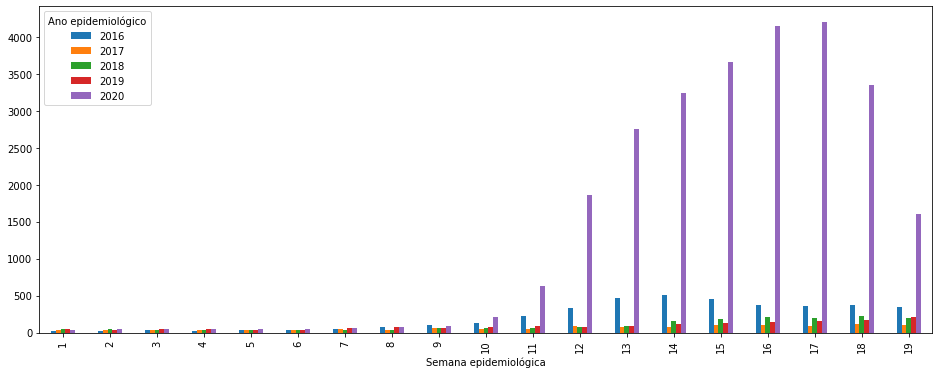

In [7]:
(
    obitos_per_week
    .groupby('Semana epidemiológica')
    .sum()
    .plot(kind='bar', figsize=(16,6))
)

In [8]:
(
    obitos
    [['Total reportado até a última atualização']]
    .unstack()
    .loc[2016:2020]
    .droplevel(0, axis=1)
)

Semana epidemiológica                      1     2    3     4     5     6   \
Ano epidemiológico Unidade da Federação                                      
2016               Acre                   0.0   2.0  1.0   1.0   2.0   0.0   
                   Alagoas                0.0   0.0  0.0   0.0   0.0   0.0   
                   Amapá                  0.0   0.0  0.0   0.0   0.0   0.0   
                   Amazonas               0.0   0.0  0.0   0.0   0.0   0.0   
                   Bahia                  0.0   0.0  2.0   0.0   1.0   0.0   
...                                       ...   ...  ...   ...   ...   ...   
2020               Roraima                0.0   0.0  0.0   0.0   0.0   0.0   
                   Santa Catarina         1.0   0.0  2.0   1.0   0.0   1.0   
                   Sergipe                0.0   0.0  0.0   0.0   0.0   0.0   
                   São Paulo             11.0  11.0  7.0  13.0  11.0  11.0   
                   Tocantins              0.0   0.0  2.0   0.0   1.0   3.0   

Semana epidemiológica                      7     8     9      10     11  \
Ano epidemiológico Unidade da Federação                                   
2016               Acre                   0.0   0.0   0.0    1.0    0.0   
                   Alagoas                0.0   0.0   1.0    0.0    2.0   
                   Amapá                  0.0   0.0   1.0    1.0    0.0   
                   Amazonas               1.0   0.0   0.0    0.0    0.0   
                   Bahia                  3.0   6.0   1.0    4.0    6.0   
...                                       ...   ...   ...    ...    ...   
2020               Roraima                1.0   0.0   0.0    0.0    0.0   
                   Santa Catarina         1.0   4.0   1.0    4.0   12.0   
                   Sergipe                0.0   1.0   0.0    2.0    3.0   
                   São Paulo             23.0  22.0  34.0  110.0  380.0   
                   Tocantins              0.0   0.0   1.0    0.0    3.0   

Semana epidemiológica                        12      13      14      15  \
Ano epidemiológico Unidade da Federação                                   
2016               Acre                     1.0     0.0     0.0     3.0   
                   Alagoas                  4.0     3.0     2.0     3.0   
                   Amapá                    0.0     1.0     1.0     3.0   
                   Amazonas                 0.0     0.0     1.0     1.0   
                   Bahia                    1.0     4.0     9.0     4.0   
...                                         ...     ...     ...     ...   
2020               Roraima                  2.0     1.0     0.0     2.0   
                   Santa Catarina          34.0    62.0    40.0    41.0   
                   Sergipe                  5.0     3.0     3.0     9.0   
                   São Paulo             1012.0  1489.0  1423.0  1317.0   
                   Tocantins                2.0     0.0     2.0     3.0   

Semana epidemiológica                        16      17      18     19  
Ano epidemiológico Unidade da Federação                                 
2016               Acre                     2.0     3.0     6.0    0.0  
                   Alagoas                  2.0     2.0     5.0    3.0  
                   Amapá                    0.0     0.0     1.0    0.0  
                   Amazonas                 2.0     1.0     1.0    3.0  
                   Bahia                    8.0     7.0     7.0    5.0  
...                                         ...     ...     ...    ...  
2020               Roraima                  0.0     6.0    12.0   13.0  
                   Santa Catarina          23.0    38.0    29.0   16.0  
                   Sergipe                  4.0     9.0     9.0    5.0  
                   São Paulo             1319.0  1276.0  1039.0  546.0  
                   Tocantins                0.0     9.0    10.0    2.0  

[135 rows x 19 columns]

In [9]:
(
    obitos_per_week
)

Ano epidemiológico                           2016  2017  2018  2019   2020
Semana epidemiológica Unidade da Federação                                
1                     Acre                    0.0   0.0   2.0   3.0    0.0
                      Alagoas                 0.0   0.0   0.0   1.0    0.0
                      Amapá                   0.0   0.0   0.0   0.0    0.0
                      Amazonas                0.0   0.0   1.0   0.0    3.0
                      Bahia                   0.0   1.0   1.0   1.0    0.0
...                                           ...   ...   ...   ...    ...
19                    Roraima                 0.0   0.0   0.0   0.0   13.0
                      Santa Catarina         21.0   8.0  12.0  11.0   16.0
                      Sergipe                 0.0   0.0   3.0   2.0    5.0
                      São Paulo             117.0  21.0  53.0  36.0  546.0
                      Tocantins               0.0   1.0   2.0   0.0    2.0

[513 rows x 5 columns]

In [10]:
(
    obitos_per_week
    [[2016, 2017, 2018, 2019]]
)

Ano epidemiológico                           2016  2017  2018  2019
Semana epidemiológica Unidade da Federação                         
1                     Acre                    0.0   0.0   2.0   3.0
                      Alagoas                 0.0   0.0   0.0   1.0
                      Amapá                   0.0   0.0   0.0   0.0
                      Amazonas                0.0   0.0   1.0   0.0
                      Bahia                   0.0   1.0   1.0   1.0
...                                           ...   ...   ...   ...
19                    Roraima                 0.0   0.0   0.0   0.0
                      Santa Catarina         21.0   8.0  12.0  11.0
                      Sergipe                 0.0   0.0   3.0   2.0
                      São Paulo             117.0  21.0  53.0  36.0
                      Tocantins               0.0   1.0   2.0   0.0

[513 rows x 4 columns]

In [11]:
obitos_ema = (
    obitos_per_week
    [[2016, 2017, 2018, 2019]]
    .groupby('Unidade da Federação')
    .apply(lambda df: df.ewm(halflife = 1, axis=1).mean())
    .swaplevel()
)

In [12]:
obitos_ema

,Ano epidemiológico,2016,2017,2018,2019
Unidade da Federação,Semana epidemiológica,,,,
Acre,1,0.0,0.000000,1.142857,2.133333
Alagoas,1,0.0,0.000000,0.000000,0.533333
Amapá,1,0.0,0.000000,0.000000,0.000000
Amazonas,1,0.0,0.000000,0.571429,0.266667
Bahia,1,0.0,0.666667,0.857143,0.933333
...,...,...,...,...,...
Roraima,19,0.0,0.000000,0.000000,0.000000
Santa Catarina,19,21.0,12.333333,12.142857,11.533333
Sergipe,19,0.0,0.000000,1.714286,1.866667


In [13]:
# obitos without ewm for comparison

(
    obitos_per_week
    [[2016, 2017, 2018, 2019]]
    .swaplevel()
)

,Ano epidemiológico,2016,2017,2018,2019
Unidade da Federação,Semana epidemiológica,,,,
Acre,1,0.0,0.0,2.0,3.0
Alagoas,1,0.0,0.0,0.0,1.0
Amapá,1,0.0,0.0,0.0,0.0
Amazonas,1,0.0,0.0,1.0,0.0
Bahia,1,0.0,1.0,1.0,1.0
...,...,...,...,...,...
Roraima,19,0.0,0.0,0.0,0.0
Santa Catarina,19,21.0,8.0,12.0,11.0
Sergipe,19,0.0,0.0,3.0,2.0


In [14]:
baseline = obitos_ema[2019].unstack()

In [15]:
baseline

Semana epidemiológica,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Unidade da Federação,,,,,,,,,,,,,,,,,,,
Acre,2.133333,2.266667,1.000000,1.800000,1.733333,1.333333,0.933333,1.200000,1.600000,2.200000,3.200000,1.800000,2.000000,1.866667,2.733333,2.400000,2.600000,2.400000,1.466667
Alagoas,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.533333,1.066667,0.600000,0.000000,0.133333,1.600000,0.733333,0.666667,2.333333,2.000000,0.666667,1.266667,3.133333
Amapá,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.533333,0.000000,0.600000,0.200000,0.000000,0.533333,0.600000,1.666667,0.466667,0.000000,0.000000,0.066667,0.266667
Amazonas,0.266667,0.533333,0.000000,1.066667,1.600000,1.866667,8.733333,11.200000,9.600000,5.866667,7.066667,3.200000,2.666667,3.533333,2.733333,1.600000,2.200000,1.533333,2.066667
Bahia,0.933333,0.800000,1.066667,0.533333,0.733333,2.400000,1.666667,1.466667,0.866667,2.133333,3.066667,2.333333,2.666667,3.400000,4.666667,6.133333,3.533333,8.733333,8.200000
Ceará,0.133333,1.200000,1.200000,2.133333,0.666667,2.266667,1.333333,0.533333,2.066667,1.733333,2.400000,1.866667,3.733333,4.933333,8.000000,11.066667,9.133333,8.400000,6.600000
Distrito Federal,0.133333,0.800000,1.066667,1.200000,1.066667,0.066667,0.800000,1.466667,1.733333,1.866667,0.466667,2.066667,3.533333,2.733333,3.333333,4.000000,2.533333,1.333333,2.800000
Espírito Santo,0.000000,0.000000,0.000000,0.000000,0.266667,0.133333,0.666667,0.600000,0.266667,1.200000,3.000000,0.466667,1.933333,3.066667,1.866667,3.933333,4.200000,5.066667,4.600000
Goiás,3.933333,0.200000,2.466667,0.266667,2.200000,0.866667,3.866667,4.400000,4.933333,4.666667,8.200000,7.266667,10.866667,10.266667,13.400000,8.066667,5.933333,7.000000,7.133333


In [16]:
current = (
    obitos_per_week
    [2020]
    .swaplevel()
    .unstack()
)

In [17]:
current

Semana epidemiológica,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Unidade da Federação,,,,,,,,,,,,,,,,,,,
Acre,0.0,0.0,2.0,1.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,2.0,2.0,3.0,0.0,3.0,2.0,0.0
Alagoas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,5.0,11.0,16.0,19.0,6.0,8.0,3.0
Amapá,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,1.0,3.0,10.0,0.0,1.0
Amazonas,3.0,7.0,2.0,4.0,6.0,3.0,3.0,4.0,1.0,6.0,8.0,31.0,87.0,231.0,431.0,565.0,508.0,259.0,40.0
Bahia,0.0,1.0,6.0,0.0,1.0,1.0,0.0,2.0,7.0,7.0,15.0,31.0,46.0,59.0,66.0,112.0,84.0,72.0,35.0
Ceará,1.0,4.0,0.0,5.0,1.0,1.0,0.0,1.0,2.0,7.0,10.0,71.0,127.0,185.0,250.0,316.0,467.0,534.0,254.0
Distrito Federal,1.0,2.0,3.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,8.0,19.0,27.0,15.0,34.0,27.0,22.0,16.0,14.0
Espírito Santo,0.0,0.0,2.0,1.0,1.0,0.0,2.0,1.0,3.0,0.0,1.0,7.0,18.0,36.0,34.0,44.0,43.0,30.0,18.0
Goiás,0.0,5.0,2.0,1.0,3.0,3.0,1.0,1.0,1.0,2.0,15.0,24.0,32.0,35.0,32.0,26.0,36.0,39.0,16.0


In [18]:
covid_cases = (
    obitos
    ['SARS-CoV-2']
    .loc[2020]
    .unstack()
)

In [19]:
covid_cases.head()

Semana epidemiológica,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Unidade da Federação,,,,,,,,,,,,,,,,,,,
Acre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,0.0,3.0,2.0,0.0
Alagoas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,11.0,14.0,2.0,4.0,1.0
Amapá,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,5.0,0.0,1.0
Amazonas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,17.0,66.0,184.0,273.0,292.0,238.0,148.0,28.0
Bahia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,11.0,11.0,20.0,26.0,64.0,48.0,43.0,15.0


In [20]:
covid_cases.cumsum(axis=1)

Semana epidemiológica,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Unidade da Federação,,,,,,,,,,,,,,,,,,,
Acre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,7.0,7.0,10.0,12.0,12.0
Alagoas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,8.0,19.0,33.0,35.0,39.0,40.0
Amapá,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,5.0,10.0,10.0,11.0
Amazonas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,8.0,25.0,91.0,275.0,548.0,840.0,1078.0,1226.0,1254.0
Bahia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,13.0,24.0,44.0,70.0,134.0,182.0,225.0,240.0
Ceará,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,6.0,49.0,123.0,231.0,393.0,622.0,923.0,1217.0,1315.0
Distrito Federal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,18.0,21.0,26.0,33.0,37.0,41.0,46.0
Espírito Santo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,14.0,38.0,60.0,90.0,124.0,148.0,157.0
Goiás,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,15.0,22.0,28.0,36.0,48.0,65.0,72.0


In [21]:
estimated_subnotification = (
    (current - baseline)
    .clip(0)
    .cumsum(axis=1)
    .div(covid_cases.cumsum(axis=1))
)

In [22]:
estimated_subnotification

Semana epidemiológica,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Unidade da Federação,,,,,,,,,,,,,,,,,,,
Acre,NaN,NaN,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,0.633333,0.350000,0.238095,0.238095,0.206667,0.172222,0.172222
Alagoas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf,inf,inf,0.400000,1.013333,1.925000,1.529825,1.395960,1.468571,1.490598,1.453333
Amapá,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf,inf,inf,1.400000,1.111111,1.266667,1.633333,1.633333,1.551515
Amazonas,inf,inf,inf,inf,inf,inf,inf,inf,inf,4.950000,2.591667,1.941333,1.460073,1.310303,1.439051,1.609524,1.723377,1.725340,1.717065
Bahia,NaN,inf,inf,inf,inf,inf,inf,inf,inf,inf,14.433333,4.425641,4.202778,3.556061,3.111429,2.415423,2.220513,2.077333,2.059167
Ceará,inf,inf,inf,inf,inf,inf,inf,7.333333,7.333333,6.300000,3.366667,1.823129,1.728455,1.699856,1.614928,1.510611,1.514048,1.580170,1.650545
Distrito Federal,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,13.466667,3.377778,2.992593,3.149206,3.723077,3.630303,3.763964,3.754472,3.589855
Espírito Santo,NaN,NaN,inf,inf,inf,inf,inf,inf,inf,inf,8.200000,2.946667,2.200000,1.677193,1.597778,1.510370,1.409140,1.349099,1.357113
Goiás,NaN,inf,inf,inf,inf,inf,inf,inf,inf,inf,15.266667,6.400000,3.542222,3.539394,3.445238,3.177778,3.009722,2.714872,2.574074


In [23]:
estimated_subnotification[19]

Unidade da Federação
Acre                   0.172222
Alagoas                1.453333
Amapá                  1.551515
Amazonas               1.717065
Bahia                  2.059167
Ceará                  1.650545
Distrito Federal       3.589855
Espírito Santo         1.357113
Goiás                  2.574074
Maranhão               2.368794
Mato Grosso            2.869697
Mato Grosso do Sul     5.235897
Minas Gerais           6.384388
Paraná                 6.302874
Paraíba                2.355128
Pará                   1.131741
Pernambuco             2.217989
Piauí                  3.784762
Rio Grande do Norte    1.639535
Rio Grande do Sul      4.834314
Rio de Janeiro         1.704952
Rondônia               2.009524
Roraima                1.233333
Santa Catarina         3.483333
Sergipe                2.438596
São Paulo              1.986193
Tocantins              1.581481
Name: 19, dtype: float64